<a href="https://colab.research.google.com/github/adhe999/adhe999.github.io/blob/main/diabetes_prediction_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library


In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Import Neccessary libraries
import numpy as np
import pandas as pd

# Import Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Import Model
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

#Import Sampler libraries
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbPipeline

# Set the decimal format
pd.options.display.float_format = "{:.2f}".format

# Input the data

In [ ]:
df = pd.read_csv("diabetes_prediction_dataset.csv")

In [ ]:
df.head()
# Menampilkan 5 baris pertama dari dataset untuk melihat struktur data (kolom dan isinya).

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.00,0,1,never,25.19,6.60,140,0
1,Female,54.00,0,0,No Info,27.32,6.60,80,0
2,Male,28.00,0,0,never,27.32,5.70,158,0
3,Female,36.00,0,0,current,23.45,5.00,155,0
4,Male,76.00,1,1,current,20.14,4.80,155,0


# 1. Data Quality

# I  Handling Duplicates


In [ ]:
# Handle duplicates
# Mengecek apakah ada baris data yang terduplikasi.
duplicate_rows_data = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (3854, 9)


In [ ]:
df = df.drop_duplicates()
# Menghapus baris-baris yang duplikat agar tidak memengaruhi analisis atau model.

II  Uniqueness

In [ ]:
# Loop through each column and count the number of distinct values
# Menampilkan jumlah nilai unik di setiap kolom.
#Berguna untuk memahami tipe data (kategori atau numerik) dan mendeteksi kolom yang terlalu seragam.
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

gender: 3 distinct values
age: 102 distinct values
hypertension: 2 distinct values
heart_disease: 2 distinct values
smoking_history: 6 distinct values
bmi: 4247 distinct values
HbA1c_level: 18 distinct values
blood_glucose_level: 18 distinct values
diabetes: 2 distinct values


# III  Missing Values

In [ ]:
# Checking null values (Mengecek jumlah nilai kosong (NaN) di setiap kolom)
print(df.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [ ]:
# Remove Unneccessary value [0.00195%]
df = df[df['gender'] != 'Other']

# IV  Describe the Data

In [ ]:
# Menampilkan statistik dasar seperti mean, min, max, std untuk kolom numerik
df.describe().style.format("{:.2f}")

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96128.00,96128.00,96128.00,96128.00,96128.00,96128.00,96128.00
mean,41.80,0.08,0.04,27.32,5.53,138.22,0.09
std,22.46,0.27,0.20,6.77,1.07,40.91,0.28
min,0.08,0.00,0.00,10.01,3.50,80.00,0.00
25%,24.00,0.00,0.00,23.40,4.80,100.00,0.00
50%,43.00,0.00,0.00,27.32,5.80,140.00,0.00
75%,59.00,0.00,0.00,29.86,6.20,159.00,0.00
max,80.00,1.00,1.00,95.69,9.00,300.00,1.00


# 2. Univariate Analysis

# I | Histogram for age

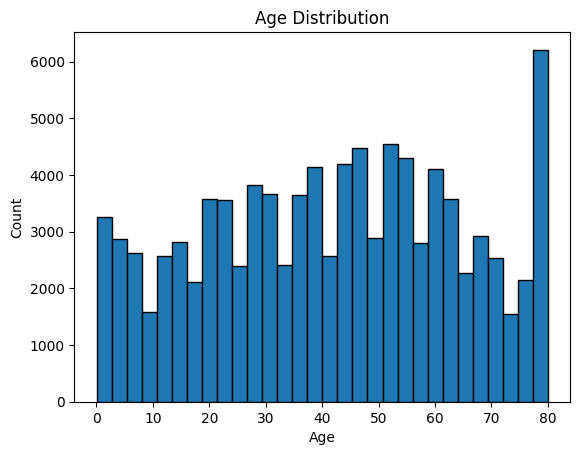

In [ ]:
# Histogram for age (Membuat histogram distribusi umur pasien.)
# Berguna untuk melihat rentang usia dominan yang diuji (misal: usia produktif atau lanjut usia)
plt.hist(df['age'], bins=30, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# II | Bar plot for gender

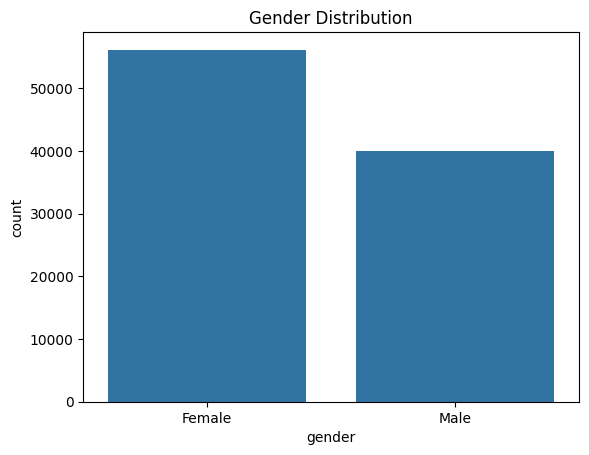

In [ ]:
# Bar plot for gender (Membuat diagram batang untuk melihat perbandingan jumlah pria dan wanita)
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.show()

# III | Distribution plot for BMI

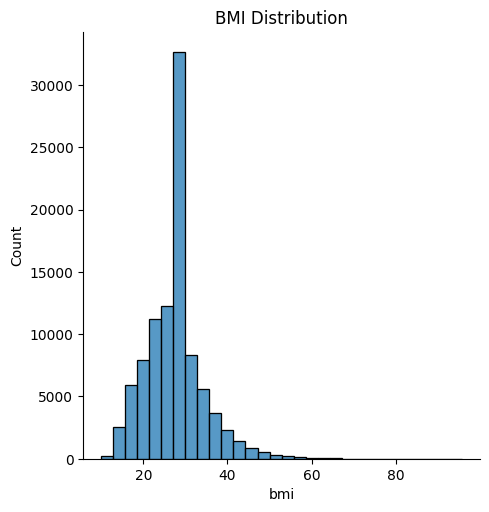

In [ ]:
# Distribution plot for BMI
# Menampilkan distribusi indeks massa tubuh (BMI).
# Membantu melihat apakah pasien lebih banyak memiliki berat badan normal, overweight, atau obesitas
sns.displot(df['bmi'], bins=30)
plt.title('BMI Distribution')
plt.show()

# IV | Count plots for binary variables

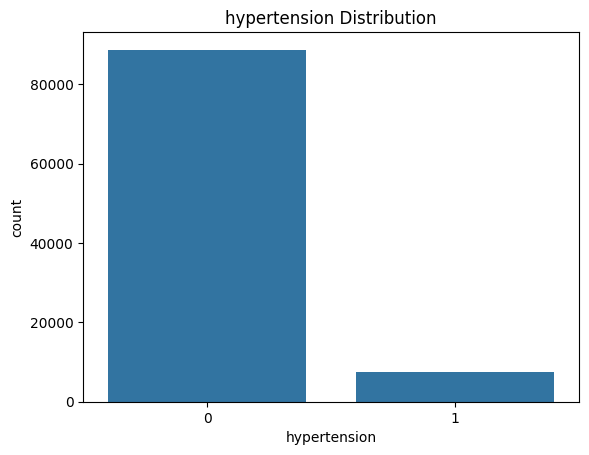

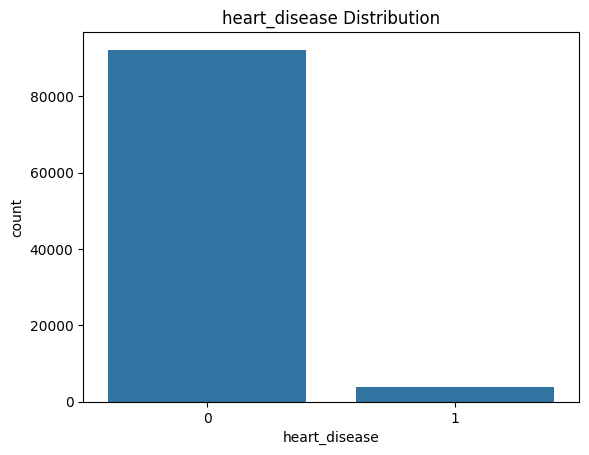

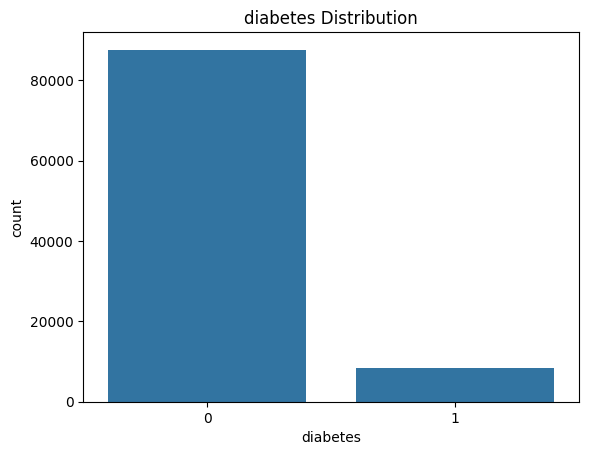

In [ ]:
# Count plots for binary variables (Membuat grafik jumlah penderita)
for col in ['hypertension', 'heart_disease', 'diabetes']:
    sns.countplot(x=col, data=df)
    plt.title(f'{col} Distribution')
    plt.show()

# V | Count plot for smoking history

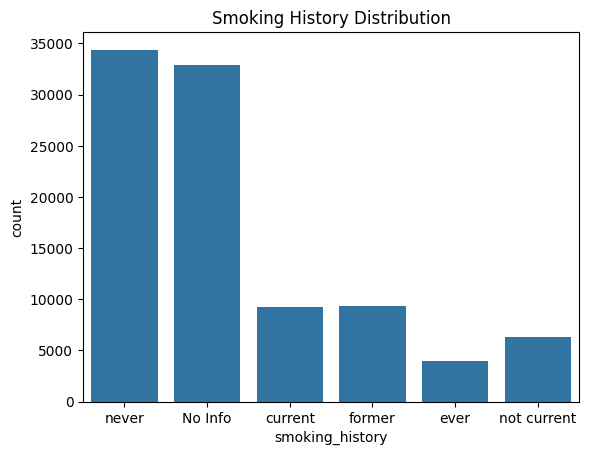

In [ ]:
# Count plot for smoking history (Menunjukkan berapa banyak pasien dengan kategori:
# “never”, “current”, “former”, “No Info”, dll.)
sns.countplot(x='smoking_history', data=df)
plt.title('Smoking History Distribution')
plt.show()

# 3.Bivariative Analysis

# I | Boxplot BMI vs Diabetes classification

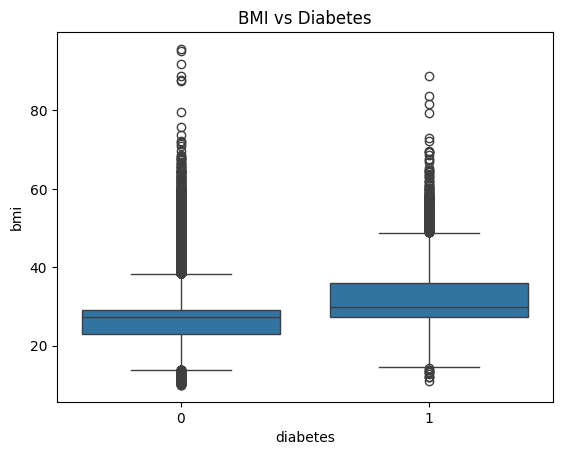

In [ ]:
# Boxplot BMI vs Diabetes classification(Membandingkan nilai BMI antara pasien diabetes dan tidak diabetes)
sns.boxplot(x='diabetes', y='bmi', data=df)
plt.title('BMI vs Diabetes')
plt.show()

# II | Boxplot Age vs Diabetes classification

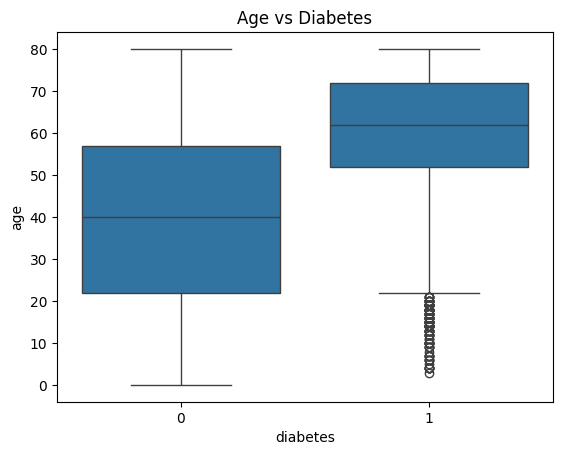

In [ ]:
# Boxplot Age vs Diabetes classification(Menunjukkan apakah usia lebih tua memiliki kecenderungan diabetes lebih tinggi.)
sns.boxplot(x='diabetes', y='age', data=df)
plt.title('Age vs Diabetes')
plt.show()

# III | Count plot of gender vs diabetes

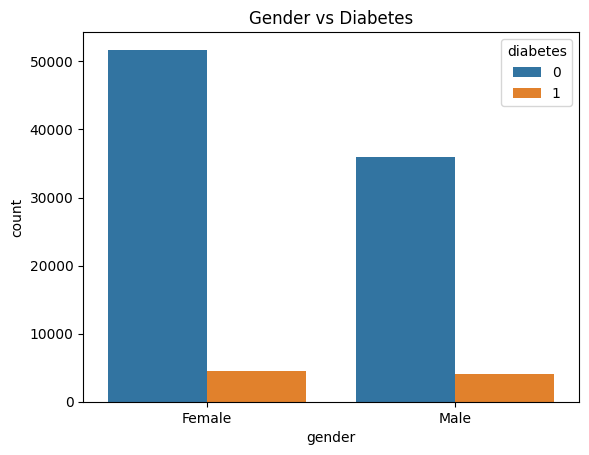

In [ ]:
# Count plot of gender vs diabetes(Melihat distribusi pria dan wanita terhadap status diabetes)
sns.countplot(x='gender', hue='diabetes', data=df)
plt.title('Gender vs Diabetes')
plt.show()

# III | Boxplot HbA1c level vs Diabetes classification

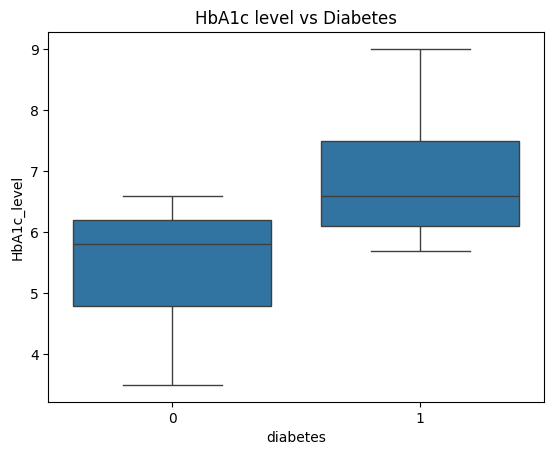

In [ ]:
# Boxplot HbA1c level vs Diabetes classification(HbA1c menggambarkan rata-rata kadar gula darah dalam 3 bulan terakhir.Biasanya jauh lebih tinggi pada pasien diabetes)
sns.boxplot(x='diabetes', y='HbA1c_level', data=df)
plt.title('HbA1c level vs Diabetes')
plt.show()

# IV | Boxplot blood glucose level vs Diabetes classification

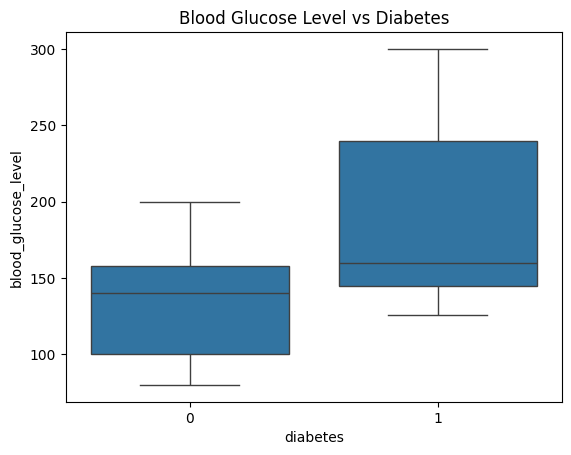

In [ ]:
# Boxplot blood glucose level vs Diabetes classification
# Menunjukkan bahwa kadar gula darah merupakan pembeda utama antara penderita dan non-penderita
sns.boxplot(x='diabetes', y='blood_glucose_level', data=df)
plt.title('Blood Glucose Level vs Diabetes')
plt.show()

# V | Pair plot for numeric features

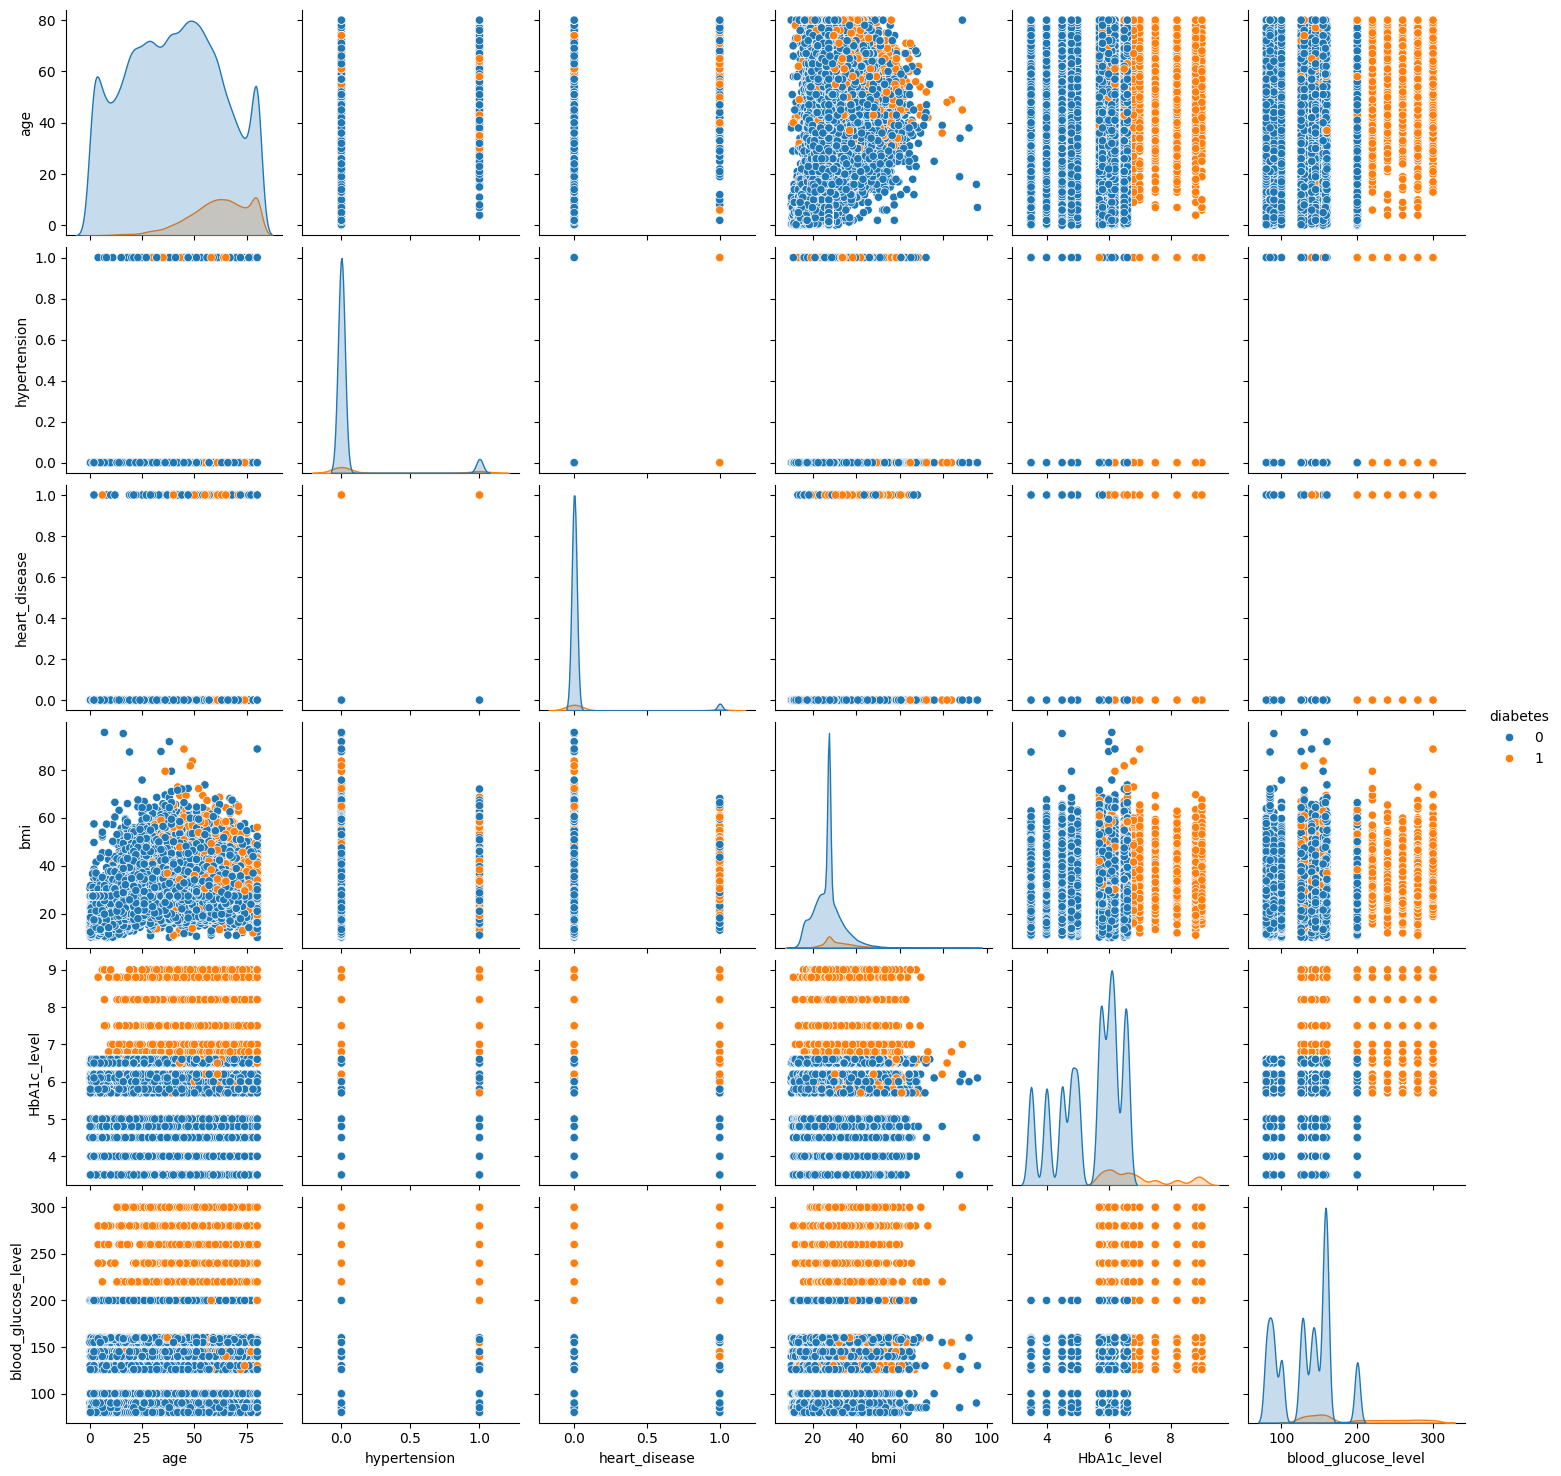

In [ ]:
# Pair plot for numeric features
# Membuat scatterplot matriks untuk semua fitur numerik, dengan warna berbeda untuk kelas diabetes.
sns.pairplot(df, hue='diabetes')
plt.show()

# 4. Multivariate analysis

# I | Scatterplot Age vs BMI colored by Diabetes classification

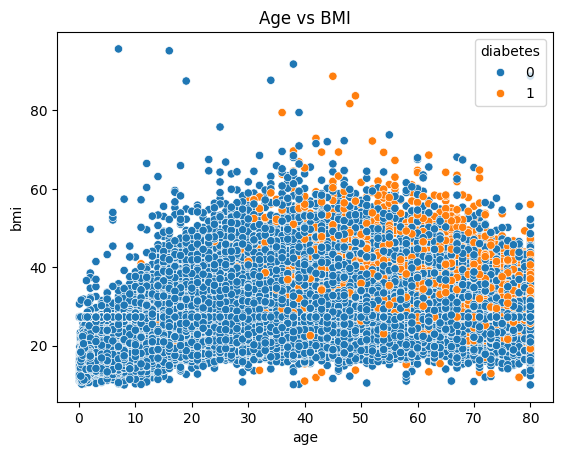

In [ ]:
# Scatterplot Age vs BMI colored by Diabetes classification
# Visualisasi gabungan yang memperlihatkan hubungan umur–BMI dan perbedaan BMI antar gender untuk tiap kategori diabetes
sns.scatterplot(x='age', y='bmi', hue='diabetes', data=df)
plt.title('Age vs BMI')
plt.show()

# II | Violin plot of BMI against diabetes classification split by gender

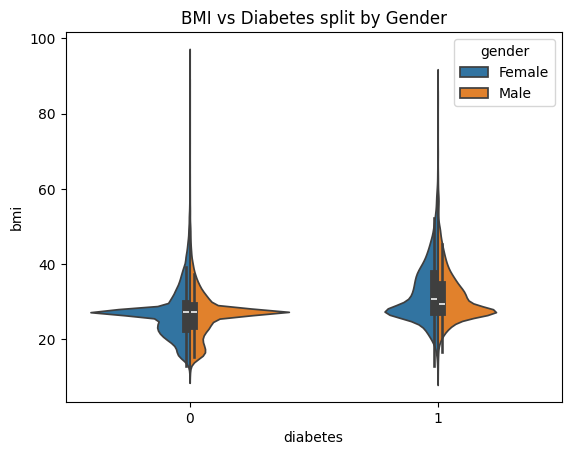

In [ ]:
# Violin plot of BMI against diabetes classification split by gender
sns.violinplot(x='diabetes', y='bmi', hue='gender', split=True, data=df)
plt.title('BMI vs Diabetes split by Gender')
plt.show()

# III | Interaction between gender, BMI and diabetes

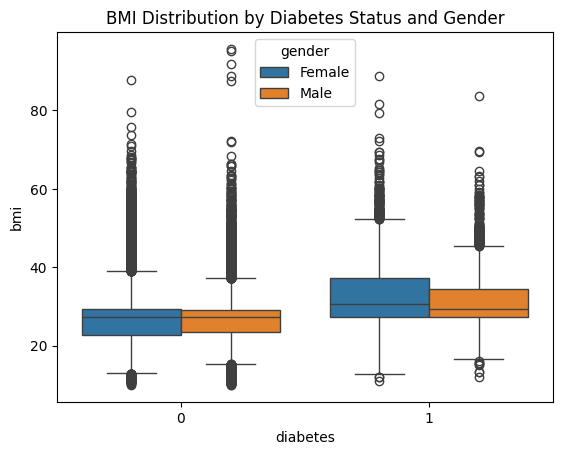

In [ ]:
# Interaction between gender, BMI and diabetes
sns.boxplot(x='diabetes', y='bmi', hue='gender', data=df)
plt.title('BMI Distribution by Diabetes Status and Gender')
plt.show()

# IV | Interaction between gender, Age and diabetes

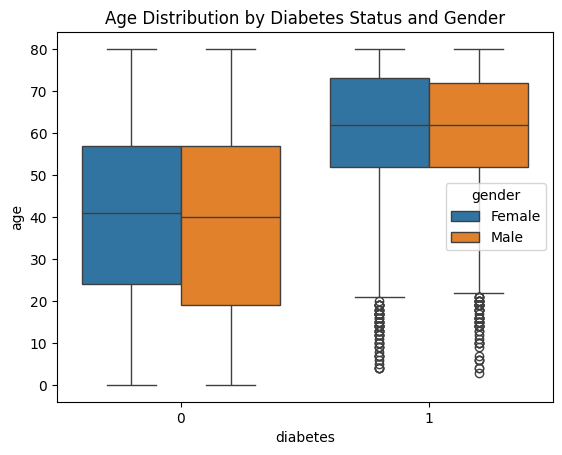

In [ ]:
# Interaction between gender, Age and diabetes
sns.boxplot(x='diabetes', y='age', hue='gender', data=df)
plt.title('Age Distribution by Diabetes Status and Gender')
plt.show()

# 2 | CORRELATION

# I | Data preparation

In [ ]:
# Define a function to map the existing categories to new ones
def recategorize_smoking(smoking_status):
    if smoking_status in ['never', 'No Info']:
        return 'non-smoker'
    elif smoking_status == 'current':
        return 'current'
    elif smoking_status in ['ever', 'former', 'not current']:
        return 'past_smoker'

# Apply the function to the 'smoking_history' column
df['smoking_history'] = df['smoking_history'].apply(recategorize_smoking)

# Check the new value counts
print(df['smoking_history'].value_counts())

smoking_history
non-smoker     67276
past_smoker    19655
current         9197
Name: count, dtype: int64


In [ ]:
data = df.copy()

# II | Encoding

In [ ]:
def perform_one_hot_encoding(df, column_name):
    # Perform one-hot encoding on the specified column
    dummies = pd.get_dummies(df[column_name], prefix=column_name)

    # Drop the original column and append the new dummy columns to the dataframe
    df = pd.concat([df.drop(column_name, axis=1), dummies], axis=1)

    return df

# Perform one-hot encoding on the gender variable
data = perform_one_hot_encoding(data, 'gender')

# Perform one-hot encoding on the smoking history variable
data = perform_one_hot_encoding(data, 'smoking_history')

# III | Correlation Matrix

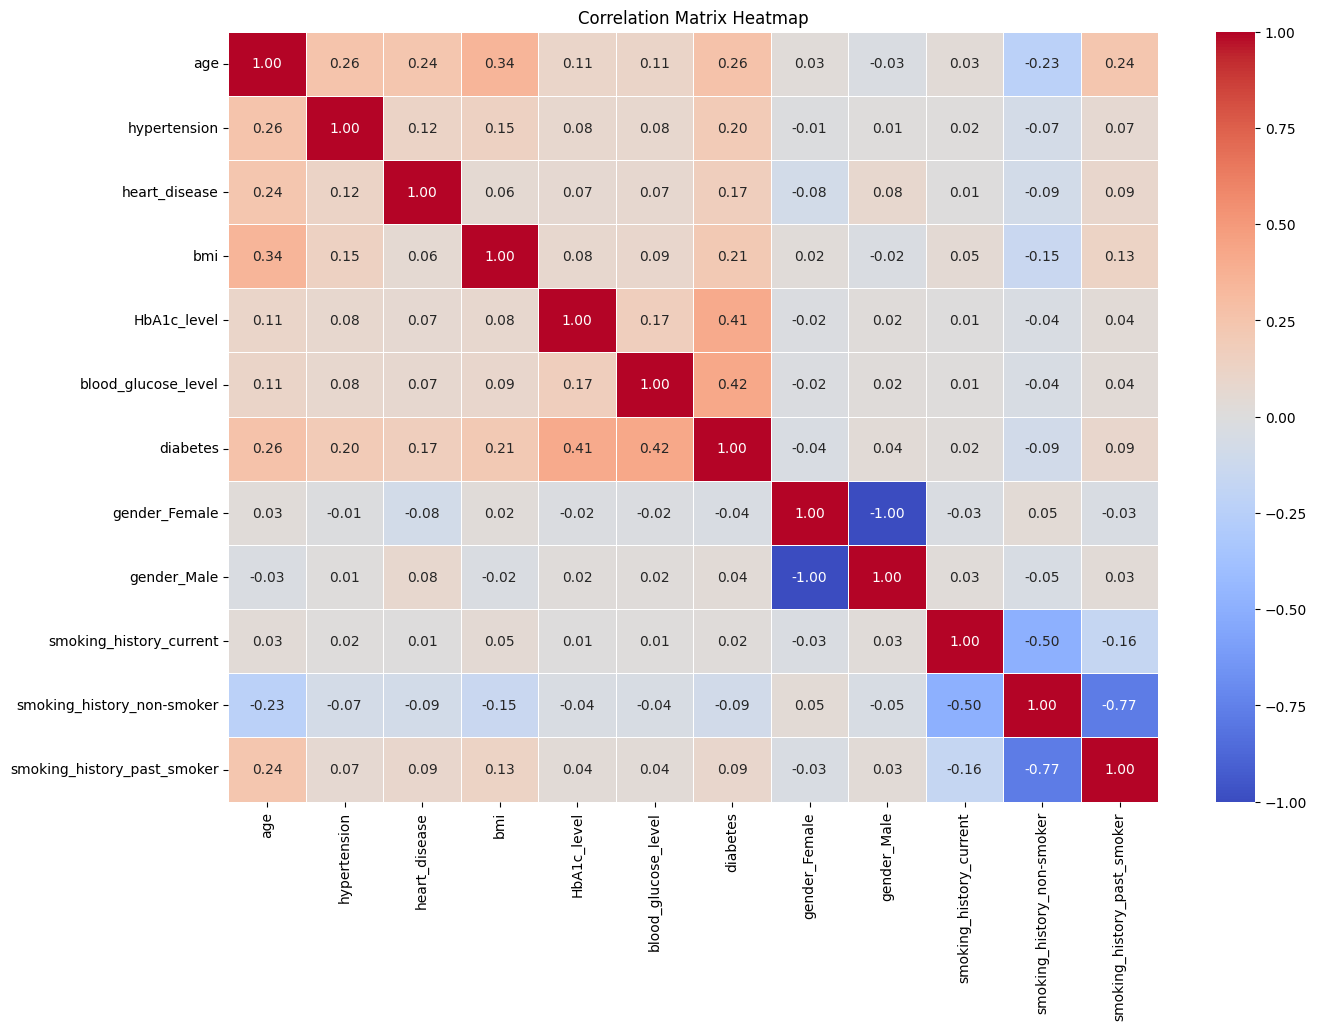

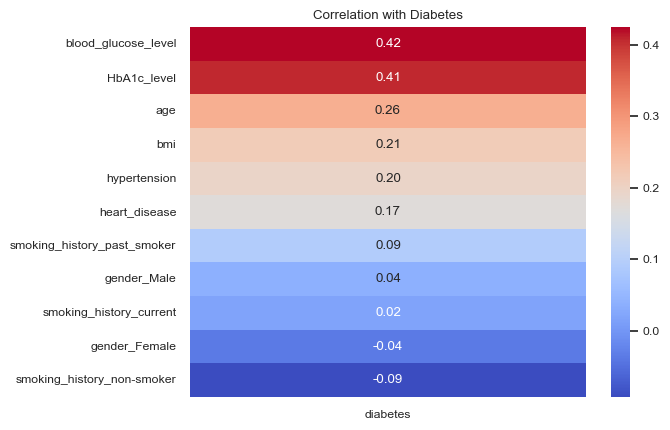

In [ ]:
# Compute the correlation matrix
correlation_matrix = data.corr()
#Graph I.
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()


#Graph II
# Create a heatmap of the correlations with the target column
corr = data.corr()
target_corr = corr['diabetes'].drop('diabetes')

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Diabetes')
plt.show()

# 3 | PREDICTIVE ANALYSIS

# 1. Class Imbalance

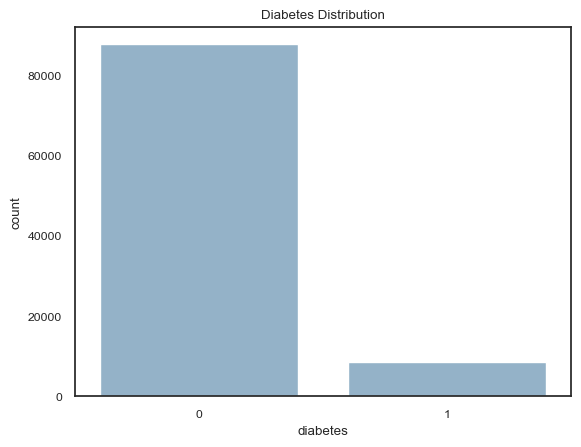

In [ ]:
# Count plot for the 'diabetes' variable
sns.countplot(x='diabetes', data=df)
plt.title('Diabetes Distribution')
plt.show()

In [ ]:
# Define resampling
# melihat kasus positif diabetes biasanya jauh lebih sedikit.
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)

# 2.Preprocessing : Scaler

In [ ]:
# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level','hypertension','heart_disease']),
        ('cat', OneHotEncoder(), ['gender','smoking_history'])
    ])

# Split data into features and target variable
X = df.drop('diabetes', axis=1)
y = df['diabetes']

In [ ]:
# Create a pipeline that preprocesses the data, resamples data, and then trains a classifier
clf = imbPipeline(steps=[('preprocessor', preprocessor),
                      ('over', over),
                      ('under', under),
                      ('classifier', RandomForestClassifier())])

# 3. Model Building and Hyperparameter Tuning

In [ ]:
# Define the hyperparameters and the values we want to test
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

In [ ]:
# Create Grid Search object
grid_search = GridSearchCV(clf, param_grid, cv=5)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters: ", grid_search.best_params_)

Best Parameters:  {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 50}


# Intepret the results

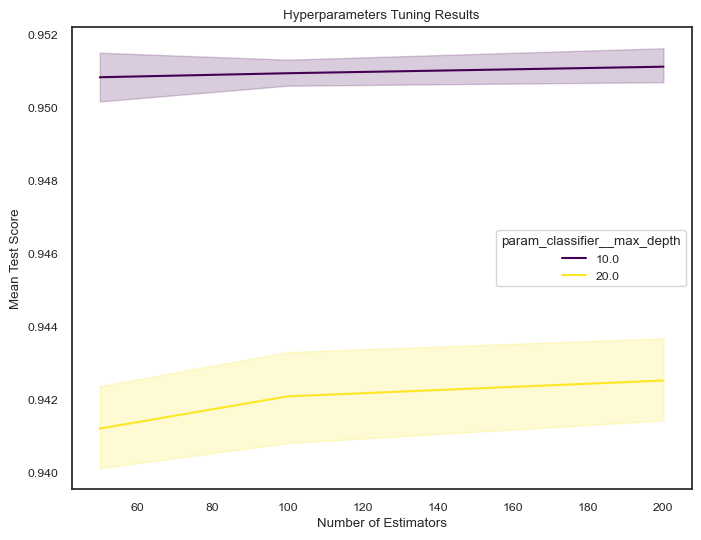

In [ ]:
# Convert GridSearchCV results to a DataFrame and plot
results_df = pd.DataFrame(grid_search.cv_results_)
plt.figure(figsize=(8, 6))
sns.lineplot(data=results_df, x='param_classifier__n_estimators', y='mean_test_score', hue='param_classifier__max_depth', palette='viridis')
plt.title('Hyperparameters Tuning Results')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Test Score')
plt.show()

# 4. Confusion Matrix

Model Accuracy:  0.9499635909705607
              precision    recall  f1-score   support

           0       0.98      0.96      0.97     17525
           1       0.69      0.80      0.74      1701

    accuracy                           0.95     19226
   macro avg       0.83      0.88      0.86     19226
weighted avg       0.95      0.95      0.95     19226



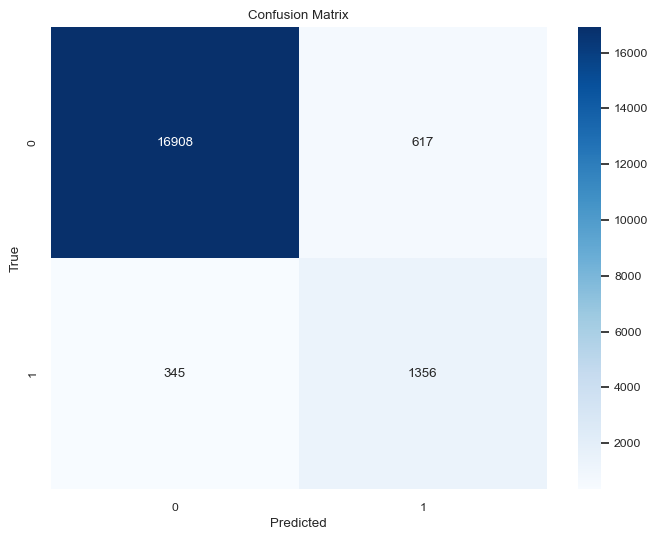

In [ ]:
# Predict on the test set using the best model
y_pred = grid_search.predict(X_test)

# Evaluate the model
print("Model Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# 5. Feature Importance

                        Feature  Importance
2                   HbA1c_level        0.48
3           blood_glucose_level        0.31
0                           age        0.10
1                           BMI        0.06
4                  hypertension        0.02
5                 heart_disease        0.02
10  smoking_history_past_smoker        0.00
9    smoking_history_non-smoker        0.00
7                   gender_Male        0.00
6                 gender_Female        0.00
8       smoking_history_current        0.00


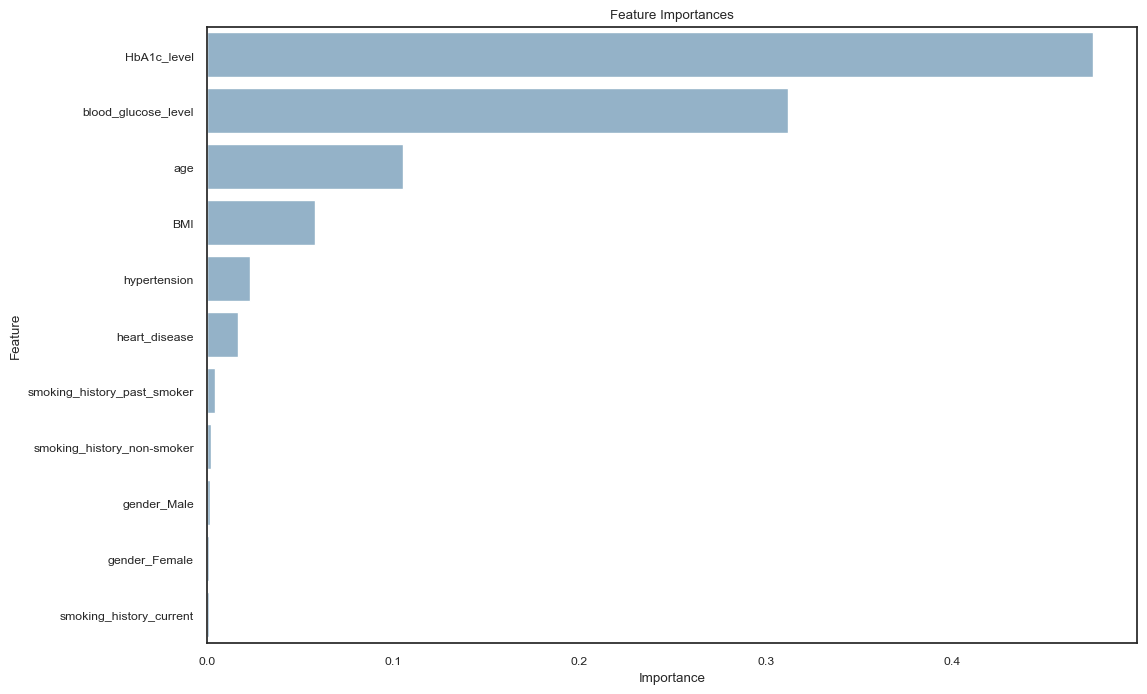

In [ ]:
# After fitting the model, we input feature names
onehot_columns = list(grid_search.best_estimator_.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(['gender', 'smoking_history']))

# Then we add the numeric feature names
feature_names = ['age', 'BMI', 'HbA1c_level', 'blood_glucose_level', 'hypertension', 'heart_disease'] + onehot_columns

# And now let's get the feature importances
importances = grid_search.best_estimator_.named_steps['classifier'].feature_importances_

# Create a dataframe for feature importance
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the dataframe by importance
importance_df = importance_df.sort_values('Importance', ascending=False)

# Print the feature importances
print(importance_df)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances')
plt.show()